In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

import pickle

### Prepare Data

In [37]:
# Load data from csv files
df = pd.read_csv('../cl_Resources/home_value_calc.csv')

In [38]:
df.head()

,Zipcode,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,...,pop_biz,commute time car,house_age,Land-Sq-Mi,zip_code,latitude,longitude,city,state,county
0,1001,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,...,461,NaN,49,11.442,1001,42.140549,-72.788661,Agawam,MA,Hampden
1,1002,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,...,480,188755.0,47,55.043,1002,42.367092,-72.464571,Amherst,MA,Hampshire
2,1003,11296.0,19.9,2499.0,-666666666.0,3829.0,10.0,3.0,1150.0,54.0,...,7,NaN,47,0.711,1003,42.369562,-72.635990,Amherst,MA,Hampshire
3,1005,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,...,89,NaN,47,44.242,1005,42.329160,-72.139465,Barre,MA,Worcester
4,1007,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,...,441,NaN,36,52.643,1007,42.280267,-72.402056,Belchertown,MA,Hampshire


In [39]:
df.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'median_home_value', 'Per Capita Income', 'Masters holders',
       'Bachelor holders', 'Median gross rent', 'Poverty Count',
       'Poverty Rate', 'Unemployment', 'Unemployment rate', 'pop_arc/eng',
       'pop_stem', 'pop_tech', 'pop_biz', 'commute time car', 'house_age',
       'Land-Sq-Mi', 'zip_code', 'latitude', 'longitude', 'city', 'state',
       'county'],
      dtype='object')

In [40]:
df = df.drop(['commute time car'], axis=1)
df = df.drop(['Zipcode', 'zip_code','latitude', 'longitude', 'city', 'state', 'county'], axis=1)

In [41]:
df.count()

Population           32734
Median Age           32734
Household Income     32734
median_home_value    32734
Per Capita Income    32452
Masters holders      32734
Bachelor holders     32734
Median gross rent    32734
Poverty Count        32734
Poverty Rate         32416
Unemployment         32734
Unemployment rate    32416
pop_arc/eng          32734
pop_stem             32734
pop_tech             32734
pop_biz              32734
house_age            32734
Land-Sq-Mi           32734
dtype: int64

In [42]:
# Remove bad data
df = df[~(df == -666666666.0).any(axis=1)]
df = df[~(df == 666668684).any(axis=1)]

In [43]:
df.count()

Population           26531
Median Age           26531
Household Income     26531
median_home_value    26531
Per Capita Income    26531
Masters holders      26531
Bachelor holders     26531
Median gross rent    26531
Poverty Count        26531
Poverty Rate         26531
Unemployment         26531
Unemployment rate    26531
pop_arc/eng          26531
pop_stem             26531
pop_tech             26531
pop_biz              26531
house_age            26531
Land-Sq-Mi           26531
dtype: int64

In [44]:
# Add a new column to df_new
df["Population Density"] = df["Population"]/df["Land-Sq-Mi"]

In [45]:
df.head()

,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,Poverty Rate,Unemployment,Unemployment rate,pop_arc/eng,pop_stem,pop_tech,pop_biz,house_age,Land-Sq-Mi,Population Density
0,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,8.391207,479.0,2.749240,149,411,240,461,49,11.442,1522.723300
1,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,27.864531,1271.0,4.240908,219,984,309,480,47,55.043,544.483404
3,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,4.399388,153.0,2.926549,104,139,19,89,47,44.242,118.168256
4,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,9.470715,543.0,3.647233,147,402,184,441,36,52.643,282.810630
5,1194.0,48.5,67250.0,235000.0,34505.0,97.0,164.0,831.0,49.0,4.103853,63.0,5.276382,30,54,20,14,55,53.796,22.194959


In [46]:
df.columns

Index(['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Bachelor holders',
       'Median gross rent', 'Poverty Count', 'Poverty Rate', 'Unemployment',
       'Unemployment rate', 'pop_arc/eng', 'pop_stem', 'pop_tech', 'pop_biz',
       'house_age', 'Land-Sq-Mi', 'Population Density'],
      dtype='object')

In [47]:
df.head()

,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,Poverty Rate,Unemployment,Unemployment rate,pop_arc/eng,pop_stem,pop_tech,pop_biz,house_age,Land-Sq-Mi,Population Density
0,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,8.391207,479.0,2.749240,149,411,240,461,49,11.442,1522.723300
1,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,27.864531,1271.0,4.240908,219,984,309,480,47,55.043,544.483404
3,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,4.399388,153.0,2.926549,104,139,19,89,47,44.242,118.168256
4,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,9.470715,543.0,3.647233,147,402,184,441,36,52.643,282.810630
5,1194.0,48.5,67250.0,235000.0,34505.0,97.0,164.0,831.0,49.0,4.103853,63.0,5.276382,30,54,20,14,55,53.796,22.194959


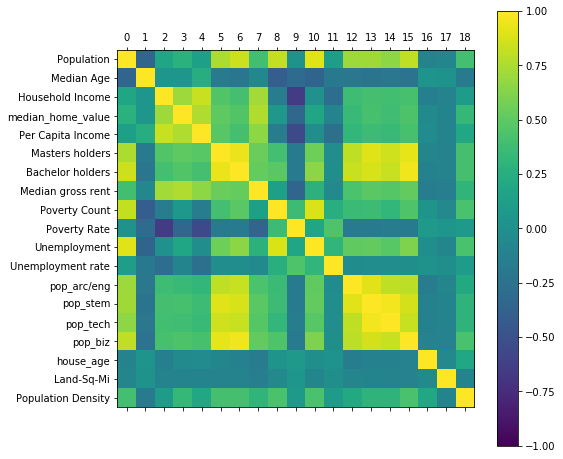

In [48]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

# data = pandas.read_csv(url, names=names)
# df_test = df_new.drop("median_home_value", axis=1)
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Bachelor holders',
       'Median gross rent', 'Poverty Count', 'Poverty Rate', 'Unemployment',
       'Unemployment rate', 'pop_arc/eng', 'pop_stem', 'pop_tech', 'pop_biz',
       'house_age', 'Land-Sq-Mi', 'Population Density']
# ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [49]:
# Drop correlated feature columns
df_test_col_removed = df.drop(['Unemployment', "Poverty Count", 'pop_tech', 'Bachelor holders', 'pop_biz','pop_stem', 'Land-Sq-Mi' ], axis=1)
df_test_col_removed.columns
df_test_col_removed.count()

Population            26531
Median Age            26531
Household Income      26531
median_home_value     26531
Per Capita Income     26531
Masters holders       26531
Median gross rent     26531
Poverty Rate          26531
Unemployment rate     26531
pop_arc/eng           26531
house_age             26531
Population Density    26531
dtype: int64

In [50]:
df_test_col_removed.count()

Population            26531
Median Age            26531
Household Income      26531
median_home_value     26531
Per Capita Income     26531
Masters holders       26531
Median gross rent     26531
Poverty Rate          26531
Unemployment rate     26531
pop_arc/eng           26531
house_age             26531
Population Density    26531
dtype: int64

In [51]:
# # Save the dataset to csv
# df_test_col_removed.to_csv("clean_house_value_data.csv", index=False)

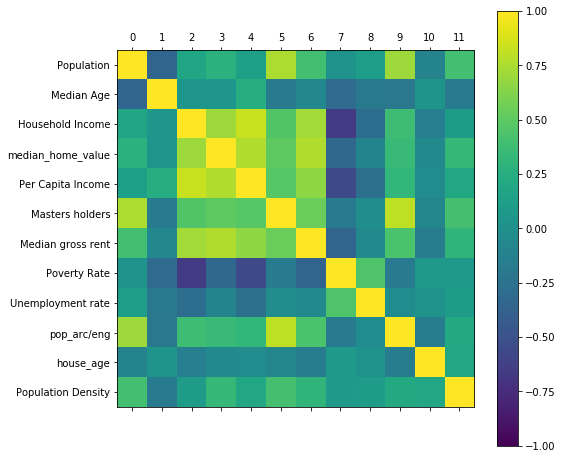

In [52]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

# data = pandas.read_csv(url, names=names)
# df_test = df_new.drop("median_home_value", axis=1)
correlations = df_test_col_removed.corr()
# plot correlation matrix
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Median gross rent',
       'Poverty Rate', 'Unemployment rate', 'pop_arc/eng',
       'house_age', 'Population Density']
# ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [53]:
# Assign the data to X and y
X = df_test_col_removed.drop('median_home_value', axis=1)
y = df_test_col_removed["median_home_value"].values.reshape(-1, 1)
print(X.shape, y.shape)

(26531, 11) (26531, 1)


In [54]:
X

,Population,Median Age,Household Income,Per Capita Income,Masters holders,Median gross rent,Poverty Rate,Unemployment rate,pop_arc/eng,house_age,Population Density
0,17423.0,45.0,56714.0,30430.0,1353.0,975.0,8.391207,2.749240,149,49,1522.723300
1,29970.0,23.2,48923.0,26072.0,2956.0,1206.0,27.864531,4.240908,219,47,544.483404
3,5228.0,44.1,70568.0,32169.0,327.0,926.0,4.399388,2.926549,104,47,118.168256
4,14888.0,42.5,80502.0,36359.0,1455.0,921.0,9.470715,3.647233,147,36,282.810630
5,1194.0,48.5,67250.0,34505.0,97.0,831.0,4.103853,5.276382,30,55,22.194959
7,3718.0,46.6,83273.0,38693.0,357.0,773.0,2.555137,3.550296,76,47,107.014363
8,1523.0,41.0,74722.0,29951.0,46.0,881.0,7.222587,3.611293,6,70,48.171812
9,528.0,50.5,60417.0,34032.0,40.0,1106.0,11.363636,5.871212,10,63,40.246970
10,22943.0,35.0,40876.0,21677.0,867.0,840.0,18.450072,4.781415,143,70,4079.480797
11,30629.0,44.5,57851.0,29705.0,1109.0,839.0,10.336609,4.068040,320,60,2456.214916


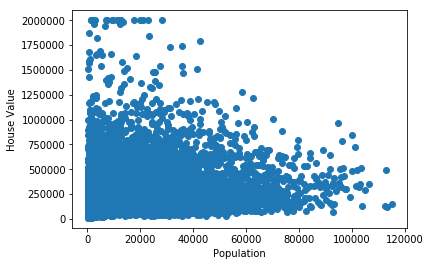

In [55]:
# Trend for Population
plt.scatter(X["Population"], y)
plt.xlabel("Population")
plt.ylabel("House Value")
plt.show()

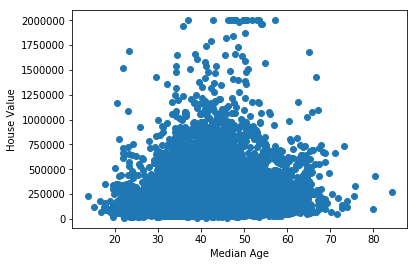

In [56]:
# Trend for Median Age
plt.scatter(X["Median Age"], y)
plt.xlabel("Median Age")
plt.ylabel("House Value")
plt.show()

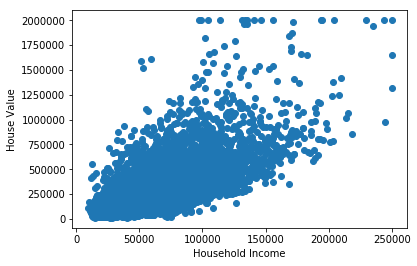

In [57]:
# Trend for Household Income
plt.scatter(X["Household Income"], y)
plt.xlabel("Household Income")
plt.ylabel("House Value")
plt.show()

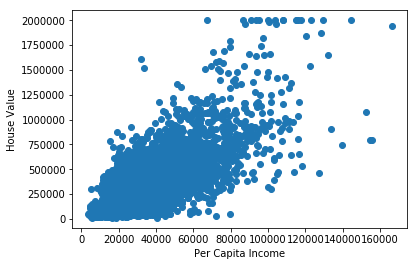

In [58]:
# Trend for Per Capita Income
plt.scatter(X["Per Capita Income"], y)
plt.xlabel("Per Capita Income")
plt.ylabel("House Value")
plt.show()

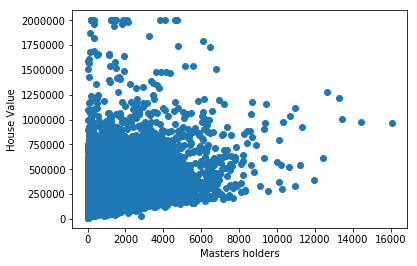

In [59]:
# Trend for 'Masters holders'
plt.scatter(X['Masters holders'], y)
plt.xlabel('Masters holders')
plt.ylabel("House Value")
plt.show()

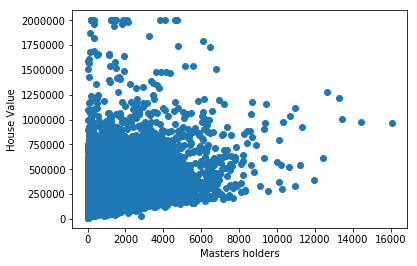

In [60]:
# Trend for 'Masters holders'
plt.scatter(X['Masters holders'], y)
plt.xlabel('Masters holders')
plt.ylabel("House Value")
plt.show()

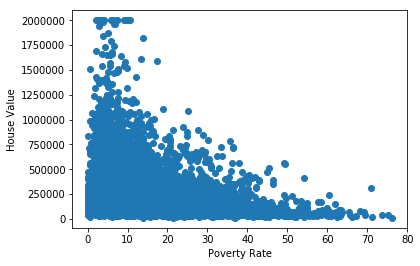

In [61]:
# Trend for Poverty Rate
plt.scatter(X["Poverty Rate"], y)
plt.xlabel("Poverty Rate")
plt.ylabel("House Value")
plt.show()

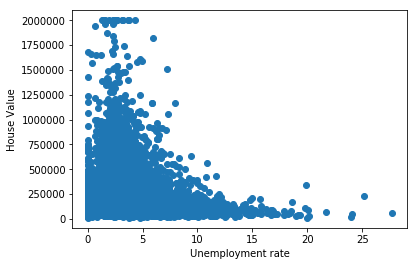

In [62]:
# Trend for Unemployment Rate
plt.scatter(X["Unemployment rate"], y)
plt.xlabel("Unemployment rate")
plt.ylabel("House Value")
plt.show()

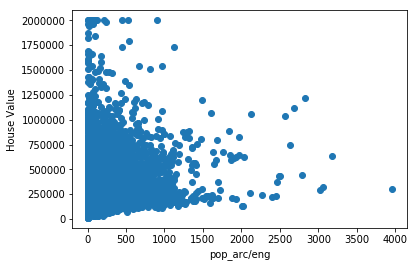

In [63]:
# Trend for pop_arc/eng
plt.scatter(X["pop_arc/eng"], y)
plt.xlabel("pop_arc/eng")
plt.ylabel("House Value")
plt.show()

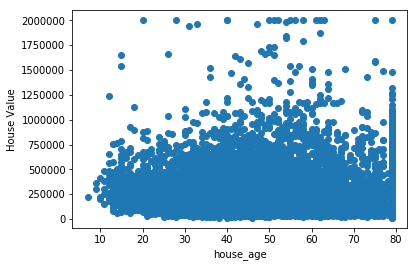

In [64]:
# Trend for Population Density
plt.scatter(X["house_age"], y)
plt.xlabel("house_age")
plt.ylabel("House Value")
plt.show()

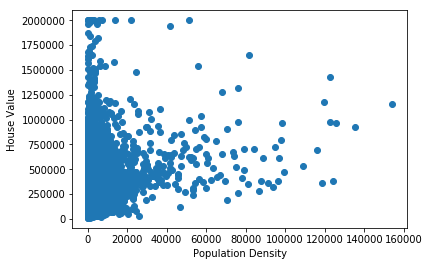

In [65]:
# Trend for Population Density
plt.scatter(X["Population Density"], y)
plt.xlabel("Population Density")
plt.ylabel("House Value")
plt.show()

In [66]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
# Scale data with SKLearn StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [68]:
X_test_scaled[0]

array([-0.64037772,  0.97228792, -0.70422572, -0.61188312, -0.53149693,
       -1.08518533, -0.96715911,  0.19968403, -0.53607075, -0.82842387,
       -0.26479284])

### Linear regression Model

In [69]:
X_test.to_csv("features.csv", index=False)

In [70]:
## Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
# Fitting our model with training data
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# Make prediction with test data
predictions = model.predict(X_test_scaled)

In [73]:
predictions

array([[-0.94300607],
       [-0.4378674 ],
       [ 1.64552508],
       ...,
       [ 0.70940529],
       [-0.04272023],
       [-0.03925136]])

In [74]:
# Evaluate the model by Calculate the following for the test data
# 1. Calculate the mean_squared_error (mse)
# 2. the r-squared value (r2)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

# Or by calling the `score` method on the model to show the r2 score
model.score(X_test_scaled, y_test_scaled)

MSE: 0.2471094960346391, R2: 0.7368621230191434


0.7368621230191434

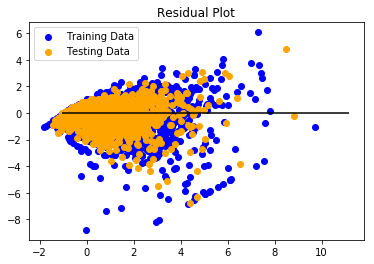

In [75]:
# Residual plot
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [76]:
# Make a prediction
# X_scaled_new = [[ 0.80809856,  1.35009033, -0.01890773,  0.34549878, -0.82941627, 0.2246137 ]]
# X_scaled_new = [[ 3.48460584, -0.82941627,  0.80809856, 0.2345, 0.5678, -0.33548015, 0.2246137 ,  1.35009033]]
# X_scaled_new = [[ 3.48460584, -0.82941627,  0.80809856,  0.34549878, -0.01890773, -0.33548015,  0.2246137 ,  1.35009033]]

# X_scaled_new = [[-0.11078969,  0.51738345,  0.*2866739,  0.34154584, -0.27276221,
#         0.98311992, -0.45964101,  0.82921035, -0.37015243, -0.01418429,
#        -0.91011539, -0.95559417]]

X_scaled_new = [[ 0.03112578,  0.78546681, -0.58000409, -0.18338835, -0.22006741,
       -0.56337918, -0.35730793, -0.16093156,  0.13908083, -0.30457034,
       -0.25241833]]
prediction_scaled = model.predict(X_scaled_new)
prediction = y_scaler.inverse_transform(prediction_scaled)
prediction

array([[110815.21490678]])

In [77]:
## LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.24690620074215222, R2: 0.737078604751022


In [78]:
## Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.24710948913226746, R2: 0.736862130369227


In [79]:
## ElasticNet model
# Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.246489154517656, R2: 0.7375227020434281


### Random Forest Regression Model

In [81]:
X_test

,Population,Median Age,Household Income,Per Capita Income,Masters holders,Median gross rent,Poverty Rate,Unemployment rate,pop_arc/eng,house_age,Population Density
7442,2052.0,48.4,39314.0,20782.0,55.0,471.0,5.604288,3.801170,0,33,26.411986
5353,1411.0,41.5,49141.0,21622.0,39.0,705.0,16.158753,3.756201,7,48,29.598087
2580,29489.0,44.2,116741.0,50410.0,3755.0,1345.0,2.261860,2.665401,244,51,1113.044463
13451,11279.0,40.4,44125.0,22207.0,574.0,542.0,21.393741,3.803529,25,43,42.562907
1286,4095.0,40.5,54375.0,27173.0,163.0,781.0,8.058608,4.590965,16,41,92.691098
14089,22486.0,45.1,59882.0,31923.0,980.0,784.0,7.160011,2.810638,215,54,1197.018898
10234,4268.0,40.9,32750.0,14353.0,78.0,710.0,16.002812,2.858482,3,29,59.399051
9689,6498.0,56.9,39630.0,24791.0,264.0,618.0,13.065559,3.662665,25,26,48.056798
13936,16736.0,48.0,111176.0,73362.0,2427.0,1299.0,2.413958,1.810468,272,52,550.399579
10054,1816.0,51.2,32035.0,19864.0,54.0,618.0,21.090308,1.817181,52,38,18.205696


In [80]:
# Train a random forest regression model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300)
rf = rf.fit(X_train_scaled, y_train_scaled)

# save the model
filename = 'cl_model.sav'
pickle.dump(rf, open(filename, 'wb'))

# R2 for training data
rf.score(X_train_scaled, y_train_scaled)

/anaconda3/envs/MyPython36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9714884708388309

In [82]:
importances = rf.feature_importances_
importances_list = sorted(zip(rf.feature_importances_, X.keys()), reverse=True)

In [83]:
importances_list

[(0.522199364333726, 'Median gross rent'),
 (0.2458093114355141, 'Per Capita Income'),
 (0.04081586531629839, 'Population Density'),
 (0.03274759595098954, 'house_age'),
 (0.03140893184228415, 'Median Age'),
 (0.02720982505856668, 'Poverty Rate'),
 (0.025601836924582632, 'Household Income'),
 (0.02144525036773882, 'Unemployment rate'),
 (0.019231254048548235, 'Masters holders'),
 (0.017351787147438773, 'pop_arc/eng'),
 (0.01617897757431319, 'Population')]

In [ ]:
# R2 for testing data
rf.score(X_test_scaled, y_test_scaled)

In [ ]:
# load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test_scaled)

In [ ]:
result

In [ ]:
# Make a prediction
X_scaled_new = [[ 0.03112578,  0.78546681, -0.58000409, -0.18338835, -0.22006741,
       -0.56337918, -0.35730793, -0.16093156,  0.13908083, -0.30457034,
       -0.25241833]]
prediction_scaled = rf.predict(X_scaled_new)
prediction = y_scaler.inverse_transform(prediction_scaled)
prediction

In [ ]:
# Make a prediction
# X_scaled_new = ([[ 0.90809856,  1.35009033, -0.01890773,  0.94549878, -0.82941627, 0 ]])
# X_scaled_new = [[ 0.80809856,  1.35009033,  3.48460584, 0.3456,  0.34549878, -0.82941627,  0.2246137 ]]
prediction_scaled = loaded_model.predict(X_scaled_new)
prediction = y_scaler.inverse_transform(prediction_scaled)
prediction

In [ ]:
loaded_model.feature_importances_

In [ ]:
importances = loaded_model.feature_importances_
importances_list = sorted(zip(loaded_model.feature_importances_, X.keys()), reverse=True)

In [ ]:
importances_list

In [ ]:
X_new = [[17423.0,45.0,56714.0,30430.0,1353.0,975.0,8.391207,2.749240,149,49,1522.723300]]

In [ ]:
p = []

In [95]:
X_test.values.tolist()

[[2052.0,
  48.4,
  39314.0,
  20782.0,
  55.0,
  471.0,
  5.604288499025341,
  3.801169590643275,
  0.0,
  33.0,
  26.411985790042735],
 [1411.0,
  41.5,
  49141.0,
  21622.0,
  39.0,
  705.0,
  16.158752657689586,
  3.7562012756909993,
  7.0,
  48.0,
  29.598086927336805],
 [29489.0,
  44.2,
  116741.0,
  50410.0,
  3755.0,
  1345.0,
  2.2618603547085354,
  2.6654006578724267,
  244.0,
  51.0,
  1113.0444628972598],
 [11279.0,
  40.4,
  44125.0,
  22207.0,
  574.0,
  542.0,
  21.393740579838642,
  3.803528681620712,
  25.0,
  43.0,
  42.562906609911096],
 [4095.0,
  40.5,
  54375.0,
  27173.0,
  163.0,
  781.0,
  8.058608058608057,
  4.590964590964591,
  16.0,
  41.0,
  92.69109758029833],
 [22486.0,
  45.1,
  59882.0,
  31923.0,
  980.0,
  784.0,
  7.160010673307836,
  2.8106377301432004,
  215.0,
  54.0,
  1197.0188980569603],
 [4268.0,
  40.9,
  32750.0,
  14353.0,
  78.0,
  710.0,
  16.002811621368323,
  2.8584817244611065,
  3.0,
  29.0,
  59.39905083990924],
 [6498.0,
  56.9,
 

In [112]:
all_X = X_test_scaled.values.tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
p = []

In [ ]:
for X in all_X:
    p_scaled = rf.predict(X)[0]
    

In [106]:
X=[all_X[0]]

In [111]:
q = rf.predict(X)[0]
y_scaler.inverse_transform(q)

ValueError: non-broadcastable output operand with shape () doesn't match the broadcast shape (1,)

In [100]:
new_list = [rf.predict([X]) for X in X_test.values.tolist()]

In [101]:
new_list

[array([8.34194157]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.32552]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.46622377]),
 array([8.34194157]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.58001087]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34927502]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.34407858]),
 array([8.53270156]),
 array([8.344